# Modèle de prédiction de la prime d'assurance pour les fumeurs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [2]:
df = pd.read_csv('assurance_dataset_clean.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


In [3]:
# Stockage des individus 'fumeur' dans un dataframe
df_fumeur = df[(df['smoker'] == True)]
df_fumeur.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,True,southwest,16884.9240
11,62,female,26.29,0,True,southeast,27808.7251
14,27,male,42.13,0,True,southeast,39611.7577
19,30,male,35.30,0,True,southwest,36837.4670
23,34,female,31.92,1,True,northeast,37701.8768


y = b + w * x

In [4]:
# préparation des données pour l'entrainement
X = df_fumeur[['age','bmi']].values
Y = df_fumeur['charges'].values

print(X[:5])
print(Y[:5])

[[19.   27.9 ]
 [62.   26.29]
 [27.   42.13]
 [30.   35.3 ]
 [34.   31.92]]
[16884.924  27808.7251 39611.7577 36837.467  37701.8768]


In [5]:
modele = linear_model.LinearRegression()
modele.fit(X,Y)

print("w =", modele.coef_)
print("b =", modele.intercept_)

w = [ 266.29222371 1438.09098289]
b = -22367.449727751246


In [7]:
Y_pred = modele.predict(X)
test = []

for y, y_pred in zip(Y, Y_pred):
    i = y,y_pred
    test.append(i)

test[:10]

[(np.float64(16884.924), np.float64(22814.84094520108)),
 (np.float64(27808.7251), np.float64(31950.080082137847)),
 (np.float64(39611.7577), np.float64(45409.21342132552)),
 (np.float64(36837.467), np.float64(36385.92867933205)),
 (np.float64(37701.8768), np.float64(32590.350052002857)),
 (np.float64(38711.0), np.float64(38090.31188592494)),
 (np.float64(35585.576), np.float64(34687.01818454517)),
 (np.float64(51194.55914), np.float64(37435.244313093775)),
 (np.float64(39774.2763), np.float64(39687.57444441924)),
 (np.float64(48173.361), np.float64(50989.91391180683))]

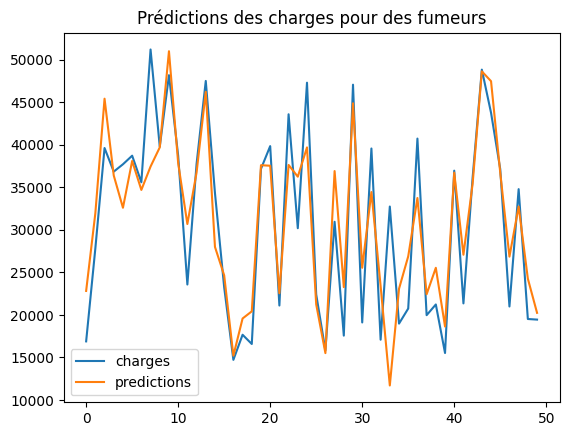

In [11]:
# Visualisation de la corrélation charges / prédictions charges pour les fumeurs
plt.plot(Y[:50], label='charges')
plt.plot(Y_pred[:50], label='predictions')
plt.title('Prédictions des charges pour des fumeurs')
plt.legend()
plt.show()